<center>

# <font size="6" color="darkblue">Trabalho Laboratorial 1</font>

<br><br>

## <font size="4" color="black">Instituto Superior de Engenharia de Lisboa</font>

### Aprendizagem Automática

#### Docente: G. Marques

<br>

#### Realizado por:

<p style="text-align: center;"><font size="3">Belarmino Rafael Sacate nº: 52057</font></p>

<p style="text-align: center;"><font size="3">Miguel Ferreira nº: 51878</font></p>

<br><br>

#### Data: 01 de Novembro de 2025

<br><br><br>

</center>

---

# Imports

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve

---

# leitura dos dados

In [71]:
fName1 = "pimaDiabetes.p"
D = pickle.load(open(fName1, 'rb')) 

X.shape:  (768, 8)
y.shape:  (768,)
Número de exemplos positivos (diabetes): 268
Número de exemplos negativos (sem diabetes): 500
Número de Características:  8
Número de Pessoas:  768
Características:  ['Number of times pregnant', 'Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)', 'Diastolic Blood Pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour Serum insulin (µh/ml)', 'Body mass index [weight in kg/(Height in m)]', 'Diabetes pedigree function', 'Age (years)']
500 mulheres sem diabetes (0) e 268 com diabetes (1)


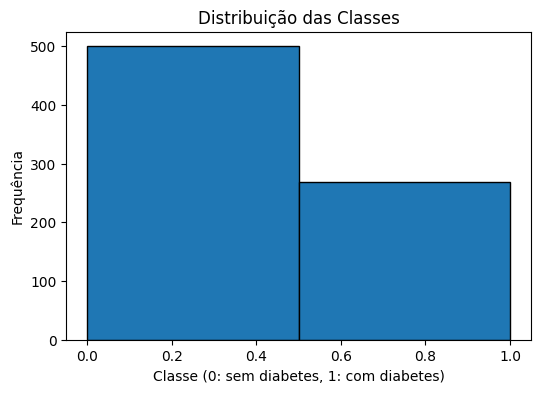

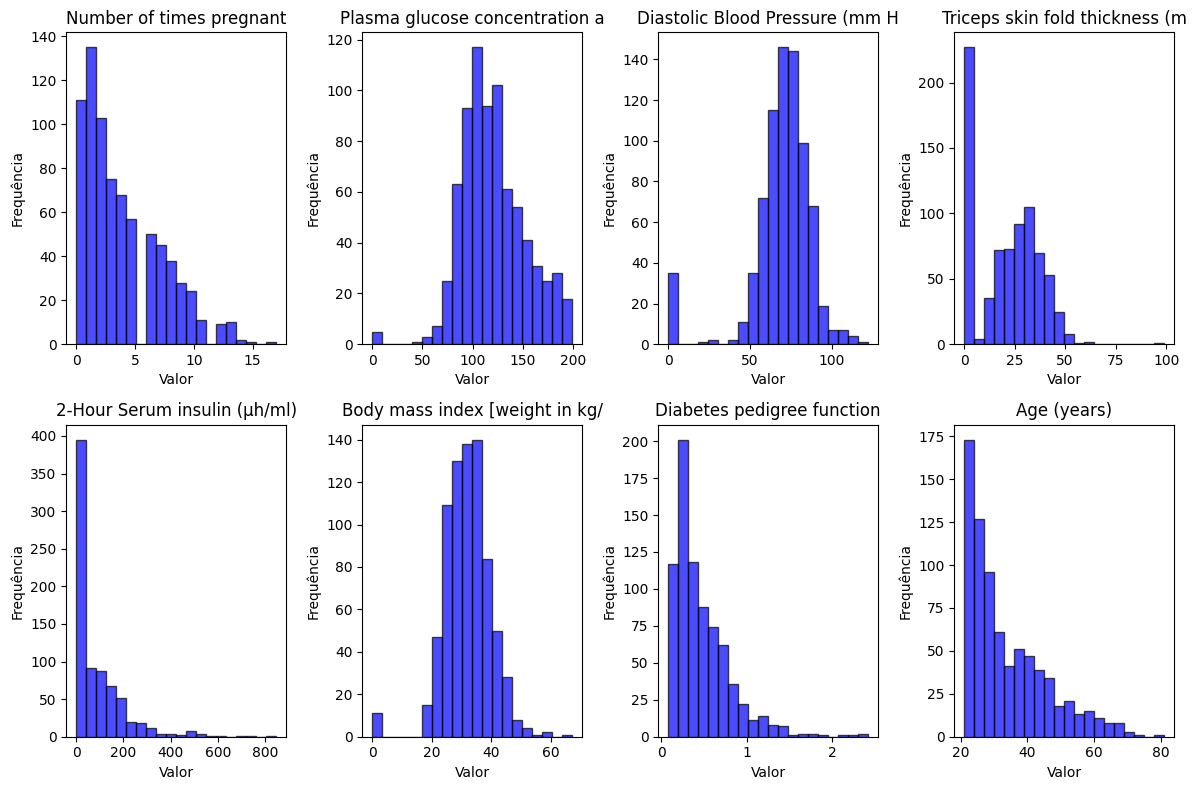

In [72]:
X = D['data']
y = D['target']
feature_names = D['feature_names']

print("X.shape: ", X.shape)
print("y.shape: ",y.shape)
print("Número de exemplos positivos (diabetes):", np.sum(y)) 
print("Número de exemplos negativos (sem diabetes):", np.sum(y == 0))
print("Número de Características: ", len(feature_names))
print("Número de Pessoas: ", len(y))
print("Características: ", feature_names)
print("500 mulheres sem diabetes (0) e 268 com diabetes (1)")

# Visualizar distribuição das classes (histograma)
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, edgecolor='black')
plt.xlabel('Classe (0: sem diabetes, 1: com diabetes)')
plt.ylabel('Frequência')
plt.title('Distribuição das Classes')
plt.show()
plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.hist(X[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(feature_names[i][:30])  # primeiros 30 caracteres do nome
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

----

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
prporcap_positivos_treino = np.sum(y_train) / len(y_train)
prporcap_positivos_teste = np.sum(y_test) / len(y_test)

print("Proporção positivos no treino: ", prporcap_positivos_treino)
print("Proporção positivos no teste: ", prporcap_positivos_teste)

Proporção positivos no treino:  0.349609375
Proporção positivos no teste:  0.34765625


---

# Funcao Principal

In [84]:
def avaliacao(model, X_test, y_test, threshold=0.2):
    """
    Avalia um modelo LogisticRegression treinado com base no código fornecido.
    """
    # Predições padrão
    y_test_pred = model.predict(X_test)
    
    # Matriz de confusao apos o treino do classificador
    print("\nMatriz de Confusão apos o treino")
    print(confusion_matrix(y_test, y_test_pred))
    erros = np.sum(y_test != y_test_pred)
    print("Erros totais:", erros)
    
    # Report
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_test_pred))
    
    # Probabilidades
    y_test_dec = model.predict_proba(X_test)[:, 1]
    
    # Predições com threshold
    y_pred_threshold = (y_test_dec >= threshold).astype(int)
    
    # Matriz de confusão com threshold
    cm_threshold = confusion_matrix(y_test, y_pred_threshold)
    print("\nMatriz de Confusão com threshold", threshold)
    print(cm_threshold)
    
    # Display da matriz de confusão com threshold
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm_threshold)
    cmd.plot(cmap='Blues')
    plt.title('Matriz de Confusão com threshold')
    plt.show()
    
    # Report com threshold
    print("\nRelatório de Classificação com threshold", threshold)
    print(classification_report(y_test, y_pred_threshold))
    
    # Calcular FPR e TPR do ponto ótimo baseado na matriz com threshold
    TN, FP = cm_threshold[0]
    FN, TP = cm_threshold[1]
    fpr_opt = FP / (FP + TN)
    tpr_opt = TP / (TP + FN)
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_dec)
    auc = roc_auc_score(y_test, y_test_dec)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot(fpr_opt, tpr_opt, 'o', markersize=8, label='Ponto ótimo')
    plt.xlabel('FPR (False Positive Rate)')
    plt.ylabel('TPR (True Positive Rate)')
    plt.title('Curva ROC - Logistic Regression (Dados Escalados)')
    plt.grid(True, alpha=0.3)
    plt.axis('scaled')
    plt.legend()
    plt.show()
    
    # Curva Precision-Recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_dec)
    idx = np.argmin(np.abs(thresholds - threshold))
    recall_point = recall[idx]
    precision_point = precision[idx]
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision)
    plt.plot(recall_point, precision_point, 'or', alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Curva Precisão Recall (>= {threshold})")
    plt.axis([0,1,0,1])
    plt.grid(True)
    plt.show()

----

### LogisticRegression

----


Matriz de Confusão apos o treino
[[141  26]
 [ 41  48]]
Erros totais: 67

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       167
           1       0.65      0.54      0.59        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256


Matriz de Confusão apos o treino
[[141  26]
 [ 41  48]]
Erros totais: 67

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       167
           1       0.65      0.54      0.59        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256


Matriz de Confusão com threshold 0.3
[[117  50]
 [ 18  71]]


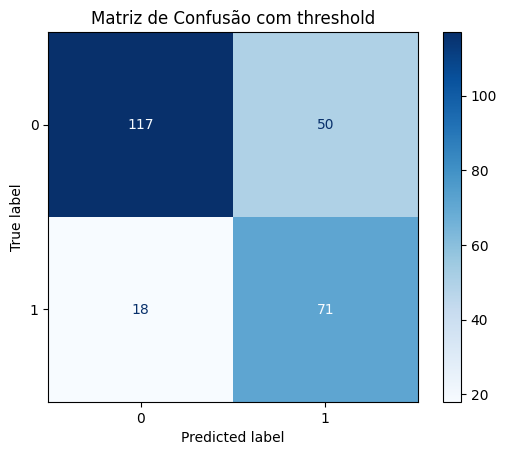


Relatório de Classificação com threshold 0.3
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       167
           1       0.59      0.80      0.68        89

    accuracy                           0.73       256
   macro avg       0.73      0.75      0.73       256
weighted avg       0.77      0.73      0.74       256



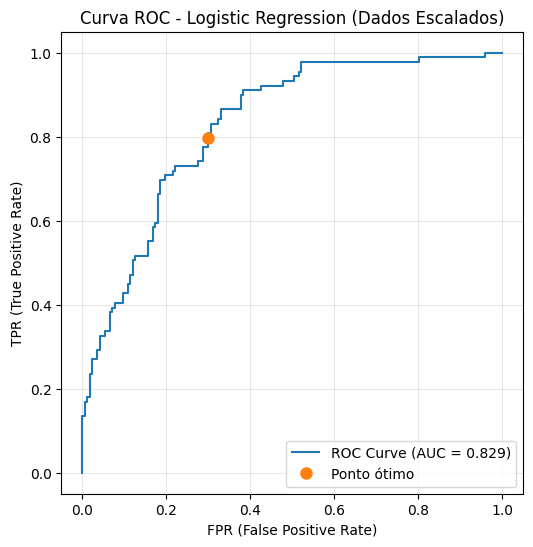

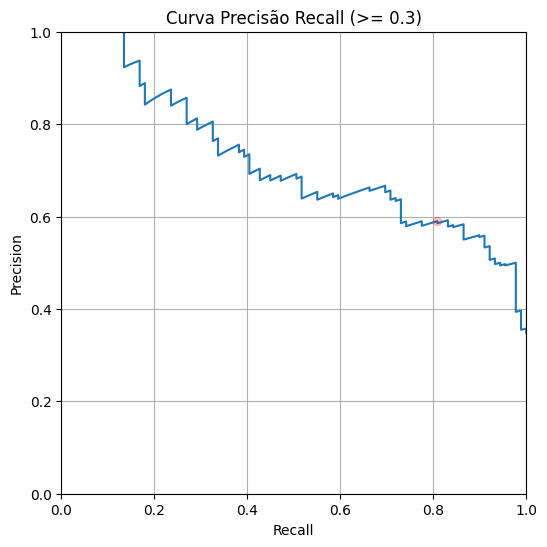

In [88]:
# Normalizacao dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_scaled = LogisticRegression(max_iter=5000, random_state=42).fit(X_train_scaled, y_train)

# Matriz de confusao e report
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
print("\nMatriz de Confusão apos o treino")
print(confusion_matrix(y_test, y_test_pred_scaled))
erros = np.sum(y_test != y_test_pred_scaled)
print("Erros totais:", erros)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred_scaled))

#avaliacoa
avaliacao(lr_scaled, X_test_scaled, y_test, 0.3)

# RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

[[117  50]
 [ 18  71]]
C:\Users\belar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\belar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\belar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Relatório de Classificação com threshold 0.3
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       167
           1       0.59      0.80      0.68        89

    accuracy                           0.73       256
   macro avg       0.73      0.75      0.73       256
weighted avg       0.77      0.73      0.74       256




from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler


(768, 8)

Matriz de Confusão: 
[[145  22]
 [ 38  51]]

Acertos: 196 de 256
Erros: 60 de 256

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.70      0.57      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



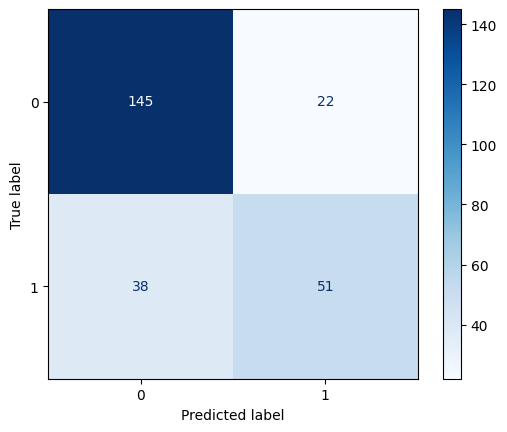

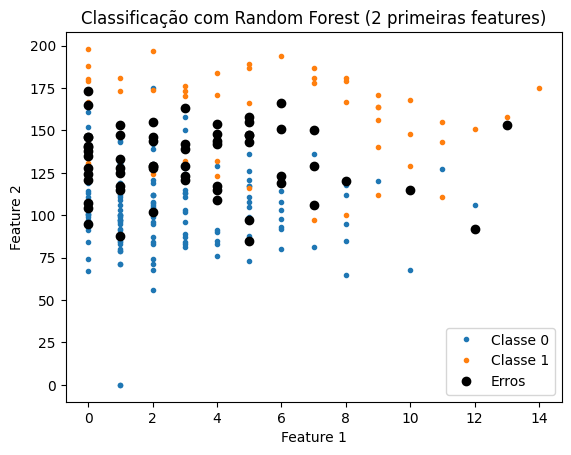

In [32]:
# dados originais

X = D['data']
y = D['target']
feature_names = D['feature_names']

print(X.shape)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, stratify=y, random_state=0
)

# A normalização dos dados não afeta o classificador 
# porque usa comparações baseadas em árvores e não a escala dos dados

# sc = StandardScaler().fit(X_train)       
# X_train = sc.transform(X_train)   
# X_test = sc.transform(X_test) 

# Treinar
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

# Estimar
ye = rfc.predict(X_test)

# Matriz de Confusão
MC = confusion_matrix(y_test, ye)
print("\nMatriz de Confusão: ")
print(MC)

b = ConfusionMatrixDisplay(MC)
b.plot(cmap='Blues'), plt.show

# Resultados
print(f"\nAcertos: {np.sum(y_test == ye)} de {len(y_test)}")
print(f"Erros: {np.sum(y_test != ye)} de {len(y_test)}")

# Avaliação
# precision = round(precision_score(y_test, ye), 3)
# recall = round(recall_score(y_test, ye), 3)
# f_score = round(f1_score(y_test, ye), 3)

# print(f"\nA precisão é: {precision}")
# print(f"A revocação é: {recall}")
# print(f"O F-score é: {f_score}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, ye))

# Gráfico (usando 2 features para visualização)
plt.figure()
plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], '.', label='Classe 0')
plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], '.', label='Classe 1')
plt.plot(X_test[y_test != ye, 0], X_test[y_test != ye, 1], 'ok', label='Erros')
plt.legend()
plt.title("Classificação com Random Forest (2 primeiras features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# [TN, FP]
# [FN, TP]


Matriz de Confusão:
[[145  22]
 [ 38  51]]

Teste 1: 
[[115  52]
 [ 17  72]]

Teste 15: 
[[82 85]
 [ 6 83]]

Teste 16: 
[[ 57 110]
 [  3  86]]


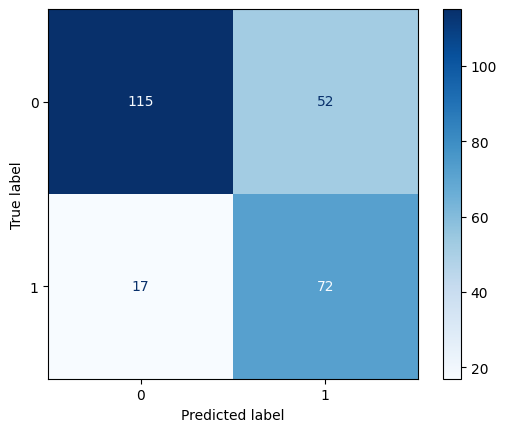

In [33]:
# reduzir os falsos negativos (FN)

# matriz de Confusão
print(f"\nMatriz de Confusão:")
print(MC)

# diabetes [1]
y_prob = rfc.predict_proba(X_test)[:, 1]

print("\nTeste 1: ")
print(confusion_matrix(y_test, y_prob>=0.3))

bb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_prob>=0.3))
bb.plot(cmap='Blues'), plt.show

# print("\nTeste 2: ")
# print(confusion_matrix(y_test, y_prob>=0.5))

# print("\nTeste 3: ")
# print(confusion_matrix(y_test, y_prob>=0.7))

# print("\nTeste 4: ")
# print(confusion_matrix(y_test, y_prob>=0.9))

# print("\nTeste 5: ")
# print(confusion_matrix(y_test, y_prob>=1))

# print("\nTeste 6: ")
# print(confusion_matrix(y_test, y_prob>=0.2))

# print("\nTeste 7: ")
# print(confusion_matrix(y_test, y_prob>=0.1))

# print("\nTeste 8: ")
# print(confusion_matrix(y_test, y_prob>=0.05))

# print("\nTeste 9: ")
# print(confusion_matrix(y_test, y_prob>=0.025))

# print("\nTeste 10: ")
# print(confusion_matrix(y_test, y_prob>=0))

# print("\nTeste 11: ")
# print(confusion_matrix(y_test, y_prob>=-1))

# print("\nTeste 12: ")
# print(confusion_matrix(y_test, y_prob>=-2.5))

# print("\nTeste 13: ")
# print(confusion_matrix(y_test, y_prob>=0.2))

# print("\nTeste 14: ")
# print(confusion_matrix(y_test, y_prob>=0.18))

print("\nTeste 15: ")
print(confusion_matrix(y_test, y_prob>=0.15))

print("\nTeste 16: ")
print(confusion_matrix(y_test, y_prob>=0.1))


# [TN, FP]
# [FN, TP]


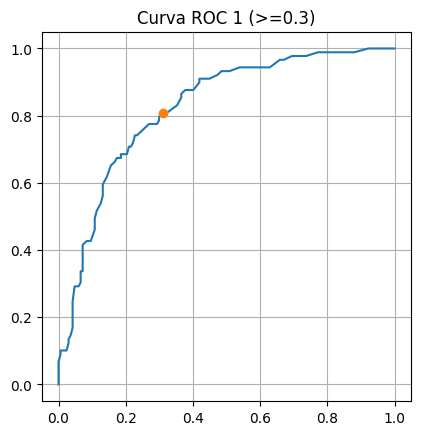

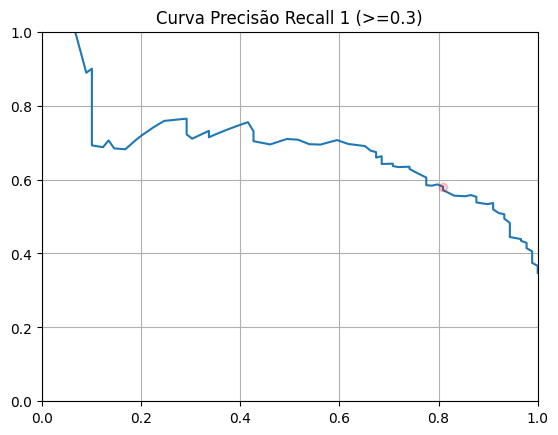

([<matplotlib.lines.Line2D at 0x1deef94cf50>],
 (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 None,
 None)

In [34]:
# [TN, FP]
# [FN, TP]

fp, tp, t = roc_curve(y_test,y_prob)

#fp_rate = fp(fp+tn)
#tp_rate = tp(tp+fn)

fp_rate = 52/(52+115)
tp_rate = 72/(72+17)


plt.title("Curva ROC 1 (>=0.3)")
plt.plot(fp,tp), plt.plot(fp_rate, tp_rate,'o'),plt.axis('scaled'), plt.grid(True),plt.show()

pr, rc, t = precision_recall_curve(y_test, y_prob)
#precision, recall, thresholds 

idx = np.argmin(np.abs(t - 0.3))

rc_point = rc[idx]
pr_point = pr[idx]

plt.title("Curva Precisão Recall 1 (>=0.3)")
plt.plot(rc,pr), plt.plot(rc_point, pr_point, 'or' ,alpha=.2),plt.axis([0,1,0,1]), plt.grid(True),plt.show()

# K-Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

(768, 8)
k-neighbors:  3

Matriz de Confusão: 
[[141  26]
 [ 35  54]]

Acertos:  195  de  256
Erros:  61  de  256

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.68      0.61      0.64        89

    accuracy                           0.76       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.76      0.76       256



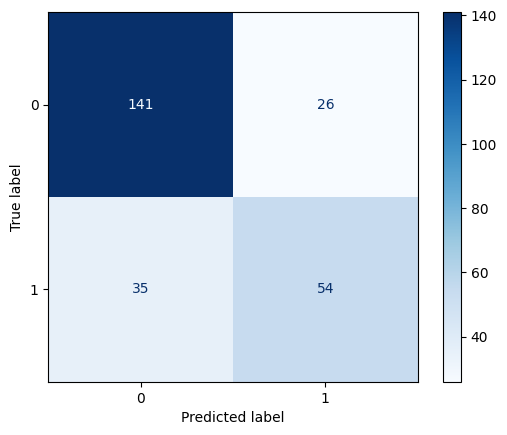

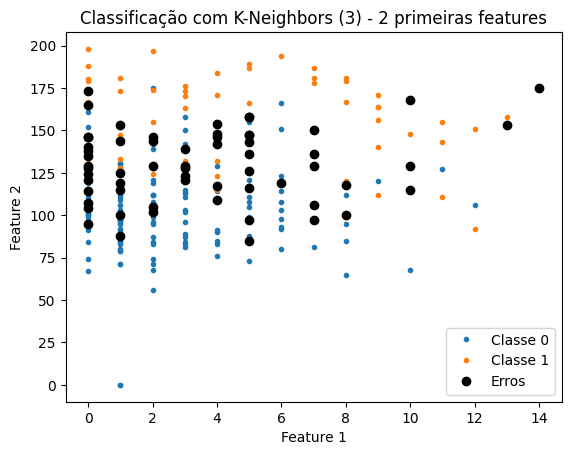

k-neighbors:  5

Matriz de Confusão: 
[[142  25]
 [ 43  46]]

Acertos:  188  de  256
Erros:  68  de  256

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       167
           1       0.65      0.52      0.57        89

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.69       256
weighted avg       0.73      0.73      0.73       256



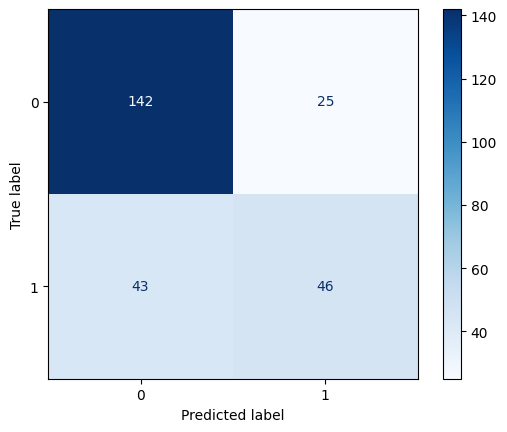

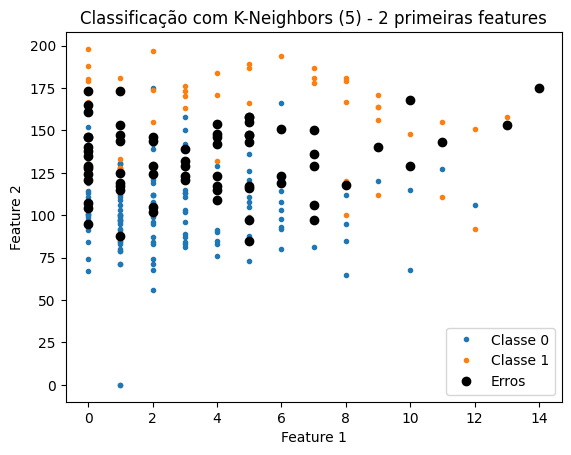

k-neighbors:  7

Matriz de Confusão: 
[[144  23]
 [ 43  46]]

Acertos:  190  de  256
Erros:  66  de  256

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       167
           1       0.67      0.52      0.58        89

    accuracy                           0.74       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



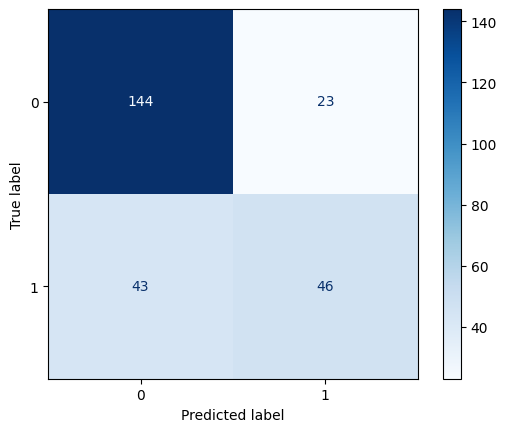

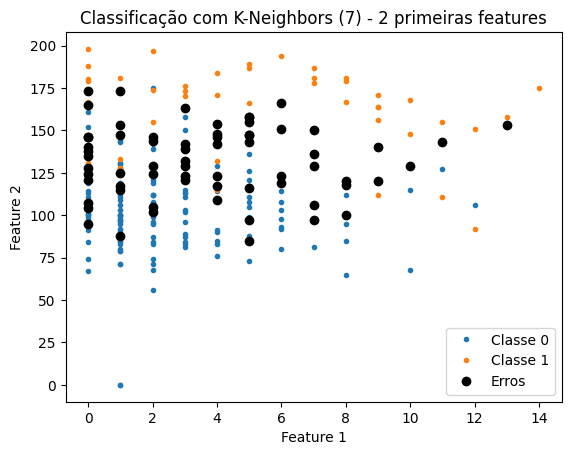

k-neighbors:  11

Matriz de Confusão: 
[[145  22]
 [ 44  45]]

Acertos:  190  de  256
Erros:  66  de  256

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       167
           1       0.67      0.51      0.58        89

    accuracy                           0.74       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



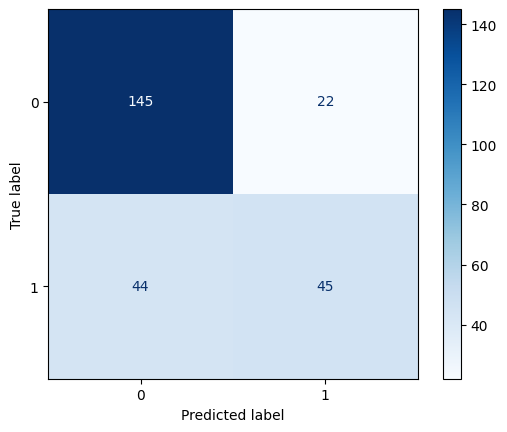

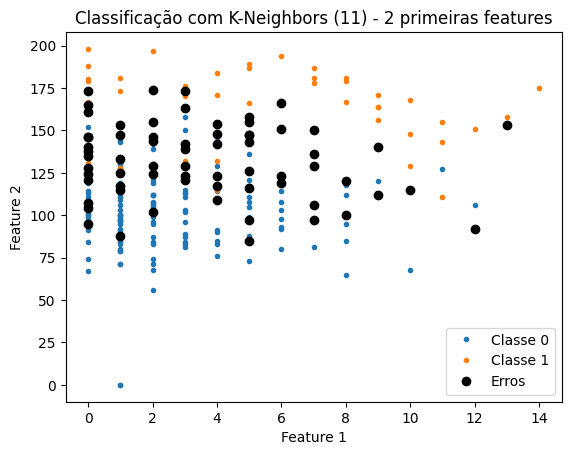

In [11]:
X = D['data']
y = D['target']
feature_names = D['feature_names']

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=0)

sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

for k in [3, 5, 7, 11]:
    print("k-neighbors: ", k)
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train_sc, y_train)

    ye = kn.predict(X_test_sc)

    MC = confusion_matrix(y_test, ye)
    print("\nMatriz de Confusão: ")
    print(MC)
    
    bkn = ConfusionMatrixDisplay(MC)
    bkn.plot(cmap='Blues'), plt.show


    # resultados
    print("\nAcertos: ", np.sum(y_test == ye), " de ", len(y_test))
    print("Erros: ", np.sum(y_test != ye), " de ", len(y_test))
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, ye))
    
    # gráfico (usando 2 features para visualização)
    plt.figure()
    plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], '.', label='Classe 0')
    plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], '.', label='Classe 1')
    plt.plot(X_test[y_test != ye, 0], X_test[y_test != ye, 1], 'ok', label='Erros')
    plt.legend()
    plt.title("Classificação com K-Neighbors (" + str(k) + ") - 2 primeiras features")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    
    
